### Name: Shahzaib     
### RegNo: 2020449

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
import string
from nltk.util import ngrams
from nltk import pos_tag

In [2]:
#reading just 500 rows and dropping the rows with missing values
data=pd.read_csv('tweets.csv',nrows=500).dropna()

In [3]:
data.drop_duplicates(inplace=True) #dropping duplicates

In [4]:
#resetting indexes
data.reset_index(inplace=True)
data.drop(columns=['index'],axis=0,inplace=True)

In [5]:
data.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
1,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
2,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
3,ScrapeLogo: acquired by RiteKit in 2015,Video : Show a company's logo based on the web...,"Prague, Czech Republic",Test RiteKit #RESTAPI solutions in demo page. ...,2015-01-31 04:13:07+00:00,176.0,54.0,274,False,2023-05-17 18:09:04+00:00,['Short'],RiteKit App
4,vigilance.eth™️ 0x676D | 🇨🇦🇮🇪🇬🇧🇨🇵,I just used my #CerberusGPT HologeneticsLab an...,"London, ON",🇨🇦 #blockchain #ai #ChatGPT #promptcraft 🤖wiza...,2021-01-30 21:03:36+00:00,123.0,299.0,8938,False,2023-05-17 18:09:00+00:00,['CerberusGPT'],Twitter Web App


### 1. Exploratory data Analysis

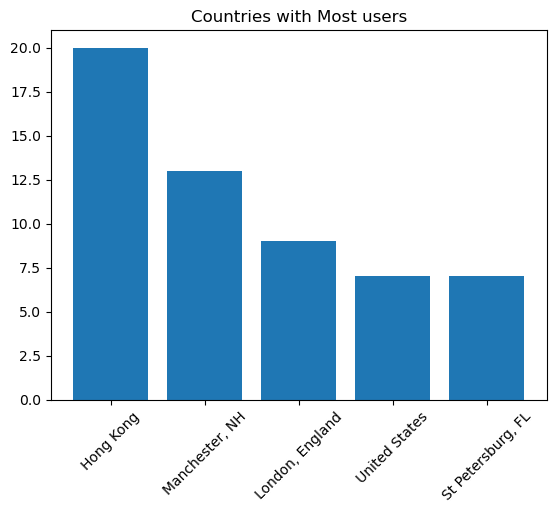

In [6]:
#checking most users are from where

x_values=[loc[0] for loc in Counter(data['user_location']).most_common(5)]
y_value=[loc[1] for loc in Counter(data['user_location']).most_common(5)]

plt.bar(x_values,y_value)
plt.title("Countries with Most users")
plt.xticks(rotation = 45)
plt.show()

In [7]:
#users with more than 2000000 followers
data[data['user_followers'] >200000]

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
29,Gartner,Want more #GartnerSales insights? Unlock exclu...,"Stamford, CT","We enable faster, smarter decisions and strong...",2008-06-25 14:03:20+00:00,432582.0,12321.0,2892,False,2023-05-17 18:00:03+00:00,['GartnerSales'],Twitter Web App
61,Gartner,Why should a #CSO care about #ChatGPT and #Gen...,"Stamford, CT","We enable faster, smarter decisions and strong...",2008-06-25 14:03:20+00:00,432582.0,12321.0,2892,False,2023-05-17 17:48:35+00:00,"['CSO', 'ChatGPT', 'GenerativeAI']",Twitter Web App
75,Gartner,Generative #AI involves 4 basic parts:\n📌 Trai...,"Stamford, CT","We enable faster, smarter decisions and strong...",2008-06-25 14:03:20+00:00,432582.0,12321.0,2892,False,2023-05-17 17:38:44+00:00,"['AI', 'UX']",Twitter Web App
82,Gartner,#DYK: 300 million full-time jobs could be expo...,"Stamford, CT","We enable faster, smarter decisions and strong...",2008-06-25 14:03:20+00:00,432582.0,12321.0,2892,False,2023-05-17 17:34:58+00:00,"['DYK', 'automation', 'AI', 'GartnerSales', 'C...",Twitter Web App
95,McKinsey & Company,It took under 6 months for generative AI to ch...,Global,"Since 1926, the trusted advisor to the world's...",2009-04-21 21:09:11+00:00,625557.0,1194.0,2562,False,2023-05-17 17:27:01+00:00,['CEOs'],Sprinklr
97,Firstpost,"#VantageOnFirstpost: The CEO of #OpenAI, #Chat...","Mumbai, India","At Firstpost, we focus on facts, keep the nois...",2011-02-23 13:09:22+00:00,2118734.0,912.0,415,False,2023-05-17 17:26:28+00:00,"['VantageOnFirstpost', 'OpenAI', 'ChatGPT']",Twitter Media Studio
153,David Lamar,@OpenAI we need a search feature to find old c...,Worldwide,Owner of The Lamar Agency. (Insurance Agency) ...,2009-10-21 16:27:39+00:00,240145.0,43.0,4098,False,2023-05-17 16:52:28+00:00,['ChatGPT'],Twitter Web App
197,Thomas Power,Where are the plugins for #ChatGPT https://t.c...,"London, England",Private Club of 100 Hand Picked Global Busines...,2007-03-20 12:37:26+00:00,287568.0,103986.0,224753,False,2023-05-17 16:32:15+00:00,['ChatGPT'],Twitter Web App
219,Glen Gilmore,“My #AI knows what’s best for me…“ ~ @imrancha...,GlenGilmore@GlenGilmore.com,"Esq ⚖️ | TIME ""man of action"" 📕Author | 🏛Forme...",2008-11-18 13:19:33+00:00,285529.0,39064.0,5400,False,2023-05-17 16:20:04+00:00,['AI'],Twitter for iPhone
238,Glen Gilmore,#ChatGPT Prompt Cheatsheet ✅\n\n#GenAI 🔑: the ...,GlenGilmore@GlenGilmore.com,"Esq ⚖️ | TIME ""man of action"" 📕Author | 🏛Forme...",2008-11-18 13:19:33+00:00,285529.0,39064.0,5400,False,2023-05-17 16:11:58+00:00,"['ChatGPT', 'GenAI', 'AI', 'ChatGPT', 'BardAI'...",Twitter for iPhone


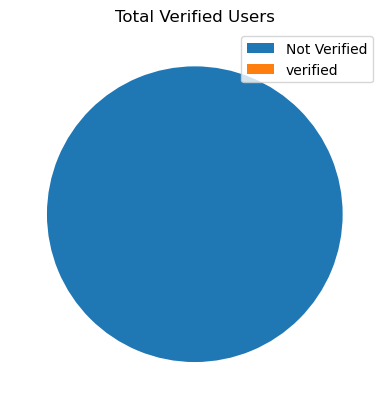

In [8]:
#Total Number of verified and non verified users
values=[len(data[data['user_verified']=='False']),len(data[data['user_verified']=='True'])]
plt.pie(values)
plt.legend(['Not Verified','verified'])
plt.title("Total Verified Users")
plt.show()

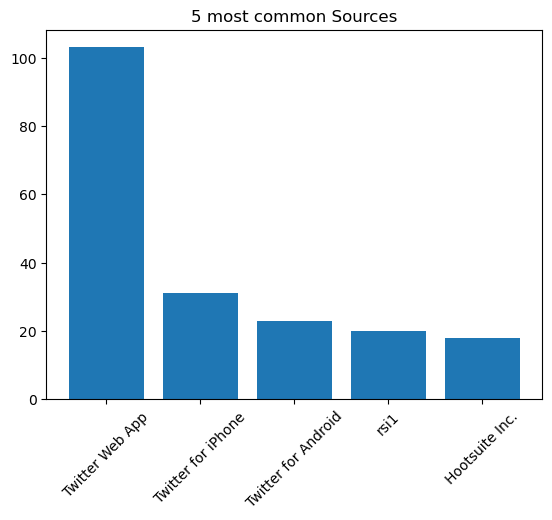

In [9]:
#checking most users are from where

x_values=[loc[0] for loc in Counter(data['source']).most_common(5)]
y_value=[loc[1] for loc in Counter(data['source']).most_common(5)]

plt.bar(x_values,y_value)
plt.title("5 most common Sources")
plt.xticks(rotation = 45)
plt.show()

### 2. Pre-Processing & Cleaning

In [10]:
texts=data['text'].copy()

In [11]:
def remove_stopwords(tokens):
    stop_words=set(stopwords.words('english'))
    ts=[]
    for token in tokens:
        if token not in stop_words:
            ts.append(token)
    return ts

def preprocess(texts):
    Filtered_text=[]
    stop_words=set(stopwords.words('english'))
    stemmer=PorterStemmer()
    for text in texts:
        temp=re.sub(r"https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+", '', text)#removing urls
        temp=re.sub('[^A-Za-z0-9]+', ' ', temp) #removing anything which is not a charactor or number
        temp=temp.lower() #normalizing the text
        temp=word_tokenize(temp) #Tokenizing
        temp=remove_stopwords(temp)
        temp=[stemmer.stem(token) for token in temp] #Steming 
        Filtered_text.append(" ".join(temp))
    return Filtered_text

In [12]:
processed_text=preprocess(data['text'])

### 3. N gram Analysis

#### Bi-grams Analysis

In [13]:
combined_text=" ".join(processed_text)
bigrams=list(ngrams(word_tokenize(combined_text),2))

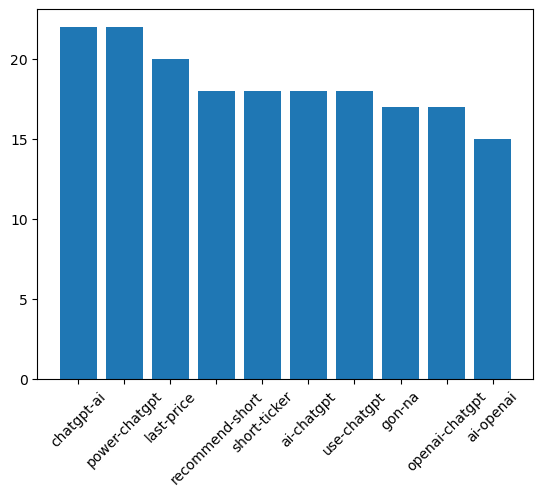

In [14]:
gram_values=["-".join(tup[0]) for tup in Counter(bigrams).most_common(10)]
gram_count=[tup[1] for tup in Counter(bigrams).most_common(10)]

plt.bar(gram_values,gram_count)
plt.xticks(rotation = 45)
plt.show()

#### Tri-gram Analysis

In [15]:
combined_text=" ".join(processed_text)
trigrams=list(ngrams(word_tokenize(combined_text),3))

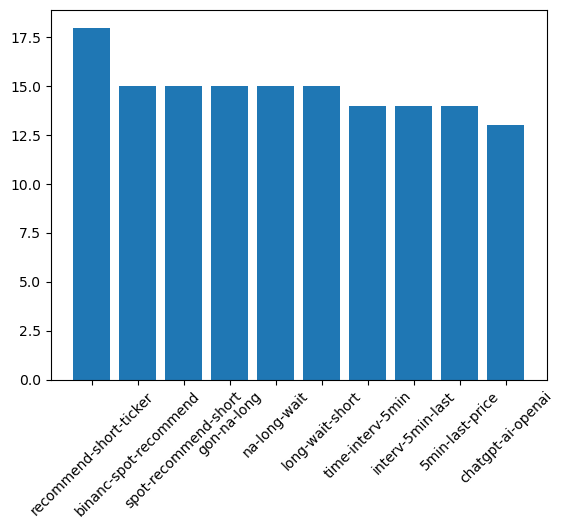

In [16]:
gram_values=["-".join(tup[0]) for tup in Counter(trigrams).most_common(10)]
gram_count=[tup[1] for tup in Counter(trigrams).most_common(10)]

plt.bar(gram_values,gram_count)
plt.xticks(rotation = 45)
plt.show()

#### Word Cloud without stop words

In [17]:
!pip install WordCloud

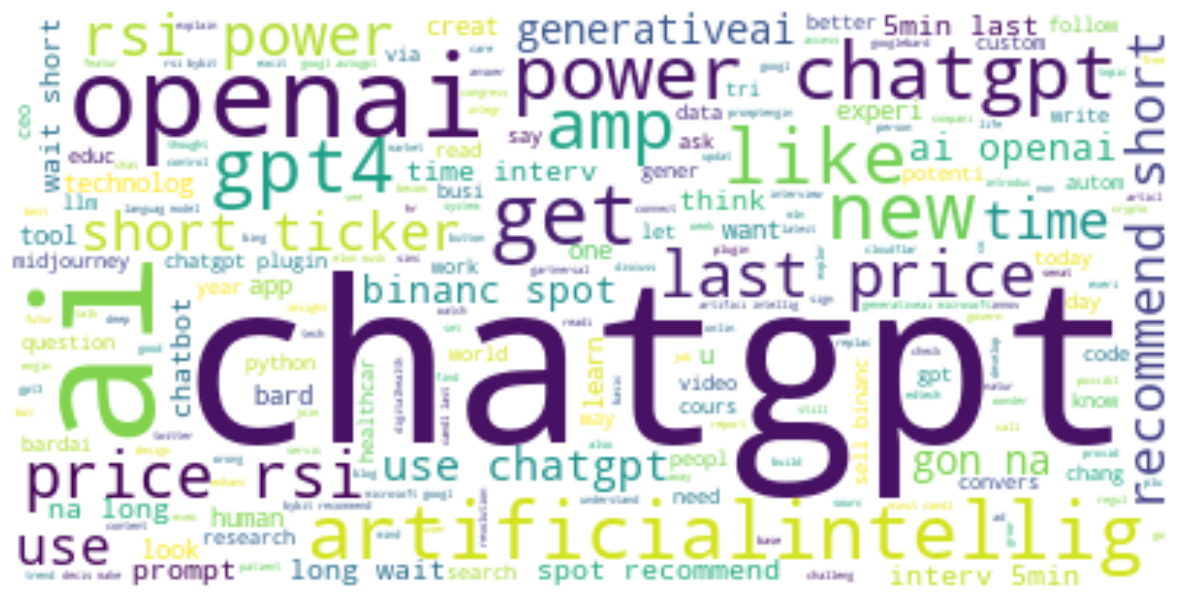

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

combined_text=" ".join(processed_text)
stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(combined_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 4. Sentiment Analysis

#### Using TextBlob

In [19]:
!pip install textblob

In [20]:
from textblob import TextBlob
#2= negative , 0= neutral , 1 positive
textblob_y=[]
positive_count = 0
negative_count = 0
neutral_count = 0
for text in processed_text:
    tokens=word_tokenize(text)
    temp=" ".join(tokens)
    blob=TextBlob(temp)
    sentiment_score=blob.sentiment.polarity
    # Threshold not mentioned PAPER: Choosing 0.1 arbitarirly
    if sentiment_score > 0.1:
        textblob_y.append(1) #positive
        positive_count+=1
    elif sentiment_score < - 0.1:
        textblob_y.append(2) #negative
        negative_count+=1
    else:
        textblob_y.append(0) #neutral
        neutral_count+=1

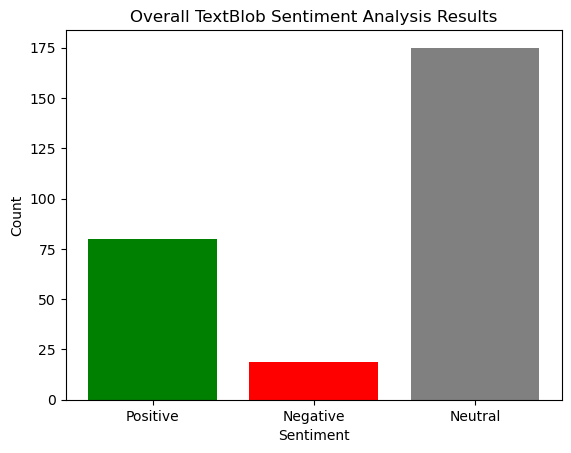

In [21]:
labels = ["Positive", "Negative", "Neutral"]
values = [positive_count, negative_count, neutral_count]
colors = ["green", "red", "grey"]
plt.bar(labels, values, color=colors)
plt.title("Overall TextBlob Sentiment Analysis Results")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

#### Using roberta

In [22]:
!pip install transformers

In [23]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/sentiment-roberta-large-english-3-classes", return_all_scores=False)
classifier("This is so nice!")

Some weights of the model checkpoint at j-hartmann/sentiment-roberta-large-english-3-classes were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/Users/student/anaconda3/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scor

[{'label': 'positive', 'score': 0.9996614456176758}]

In [24]:
def Roberta(text):
    result=classifier(text)
    result=result[0]['label']
    if result=='positive':
        return 1
    elif result=='negative':
        return 2
    else:
        return 0

In [25]:
Roberta_y=[Roberta(text) for text in processed_text]

In [26]:
#preferring Roberta vote over Textblob vote
def Vote(A,B):
    result=[]
    for i in range(len(A)):
        if A[i]==B[i]:
            result.append(A[i])
        else:
            result.append(A[i])
    return result

In [27]:
# 0= Neutral, 1=Positive, 2=Negative
DF_sentiment={
    "Text":processed_text,
    'TexTblot Sentiment':textblob_y,
    'Roberta Sentiment': Roberta_y
}
DF_sentiment=pd.DataFrame(DF_sentiment)
DF_sentiment.head(10)

,Text,TexTblot Sentiment,Roberta Sentiment
0,chatgpt think 5 crypto coin explod year yahoo ...,0,0
1,new jwvanc post 5 startup includ vcinityinc 1s...,2,0
2,get binanc spot recommend short ticker ghstusd...,0,0
3,video show compani logo base websit domain sho...,2,0
4,use cerberusgpt hologeneticslab simul hologene...,2,0
5,time sell binanc spot recommend short ticker a...,0,0
6,andr look chatgpt creat ad promot ai featur am...,0,0
7,sell binanc spot recommend short ticker farmbu...,0,0
8,timelin go wonki blame chatgpt m5nuyfveec,0,2
9,time sell binanc spot recommend short ticker m...,0,0


In [28]:
final_y=Vote(Roberta_y,textblob_y)

### 5. Feature Engineering

In [29]:
def get_verb_count(text):
    tokens=word_tokenize(text)
    tags=pos_tag(tokens)
    count=0
    for word,tag in tags:
        if tag=='VB':
            count+=1
    return count
def get_count_start_with_S(text): # My name starts with S
    count=0
    for word in word_tokenize(text):
        if word[0]=='s':
            count+=1
        else:
            pass
    return count

lenght=[len(word_tokenize(text)) for text in processed_text] #Total Words in each text
spaces=[text.count(" ") for text in processed_text] #Total Number of Spaces
characters=[len("".join(text.split())) for text in processed_text]
verbs=[get_verb_count(text) for text in processed_text]
start_with_s=[get_count_start_with_S(text) for text in processed_text]

DF_feat_engr={
    'Text':processed_text,
    'Total Words':lenght,
    'Total Spaces':spaces,
    'Total Characters':characters,
    'Total Verbs':verbs,
    'Words Starting with S':start_with_s,
    'Sentiment':final_y
}
DF_feat_engr=pd.DataFrame(DF_feat_engr)

In [30]:
DF_feat_engr.head(10)

,Text,Total Words,Total Spaces,Total Characters,Total Verbs,Words Starting with S,Sentiment
0,chatgpt think 5 crypto coin explod year yahoo ...,13,12,69,0,0,0
1,new jwvanc post 5 startup includ vcinityinc 1s...,29,28,159,0,3,0
2,get binanc spot recommend short ticker ghstusd...,28,27,137,2,3,0
3,video show compani logo base websit domain sho...,14,13,85,1,3,0
4,use cerberusgpt hologeneticslab simul hologene...,25,24,163,0,6,0
5,time sell binanc spot recommend short ticker a...,30,29,150,2,4,0
6,andr look chatgpt creat ad promot ai featur am...,11,10,61,0,0,0
7,sell binanc spot recommend short ticker farmbu...,27,26,122,1,4,0
8,timelin go wonki blame chatgpt m5nuyfveec,6,5,36,0,0,2
9,time sell binanc spot recommend short ticker m...,29,28,137,2,4,0


### 6.Vectorization

#### using Count Vectorizer ,TF-IDF and Doc2Vec

In [31]:
!pip install gensim

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tf_vectorizer = TfidfVectorizer()
cv_vectorizer = CountVectorizer()

tagged_text = [TaggedDocument(words=text, tags=[str(i)]) for i, text in enumerate(DF_feat_engr['Text'])]
Doc2Vec_model = Doc2Vec(tagged_text, min_count=3, vector_size=50)



TfIDF_df = tf_vectorizer.fit_transform(DF_feat_engr['Text'])
CountVect_df = cv_vectorizer.fit_transform(DF_feat_engr['Text'])
D2V_df=[Doc2Vec_model.infer_vector(word_tokenize(text)) for text in DF_feat_engr['Text']]

### 7. Feature Selection

In [33]:
DF2=DF_feat_engr.loc[:, DF_feat_engr.columns != 'Text']

<Axes: >

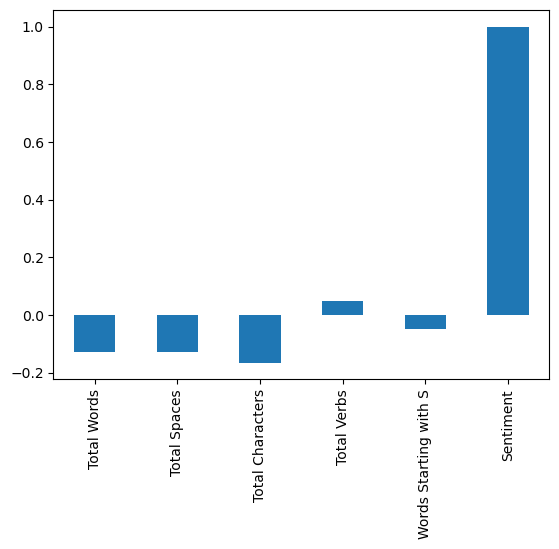

In [34]:
DF2.corrwith(DF_feat_engr['Sentiment']).plot.bar()

We can see here that none of the features play a vital role in determining sentiment therefore i will not be using these features

### 8. Prepare sets of data and Models

In [35]:
collections_df={
    'CV':CountVect_df,
    'TF-IDF':TfIDF_df,
    'Doc2Vec':D2V_df
}

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from scipy.sparse import csr_matrix
from sklearn.neural_network import MLPClassifier

collection=[]
Accuracy=[]
F1_SCORE=[]


rf=RandomForestClassifier(n_estimators=100,max_depth=5)
nb=MultinomialNB()

for name,df in collections_df.items():
    X=df
    y=final_y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Random Forest
    rf.fit(X_train, y_train)
    pred_rf=rf.predict(X_test)
    collection.append(name+"+"+"Random Forest")
    Accuracy.append(round(accuracy_score(y_test, pred_rf),4))
    F1_SCORE.append(round(f1_score(y_test, pred_rf, average='weighted'),4))
    
    #NaiveBayes
    if isinstance(X_train, csr_matrix):
        X_train = X_train.toarray()
    if isinstance(X_test, csr_matrix):
        X_test = X_test.toarray()
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test=scaler.fit_transform(X_test)
    nb.fit(X_train, y_train)
    pred_nb=nb.predict(X_test)
    collection.append(name+"+"+"naive bayes")
    Accuracy.append(round(accuracy_score(y_test, pred_nb),4))
    F1_SCORE.append(round(f1_score(y_test, pred_nb, average='weighted'),4))
    
    #RNN not in Scicket-Learn therefore using MLP
    

In [37]:
RESULT={
    "Combination":collection,
    'Accuracy':Accuracy,
    'F1-Score':F1_SCORE
}
RESULT=pd.DataFrame(RESULT)

In [38]:
RESULT

,Combination,Accuracy,F1-Score
0,CV+Random Forest,0.9818,0.9728
1,CV+naive bayes,0.7273,0.8268
2,TF-IDF+Random Forest,0.9818,0.9728
3,TF-IDF+naive bayes,0.7273,0.8268
4,Doc2Vec+Random Forest,0.9818,0.9728
5,Doc2Vec+naive bayes,0.9818,0.9728
